# Применение K Means для квантования цветов

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Изображение

In [5]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

In [7]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

Каждая тройка чисел - это отдельный пиксель в изображении. Некоторые пиксели имеют один и тот же цвет, потому что они располагаются рядом друг с другом.

In [11]:
# Посмотрим на высоту, ширину и еоличество цветов
image_as_array.shape

(1401, 934, 3)

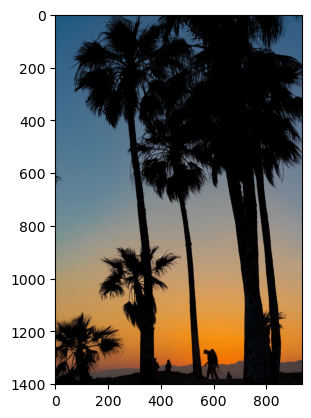

In [14]:
plt.imshow(image_as_array)

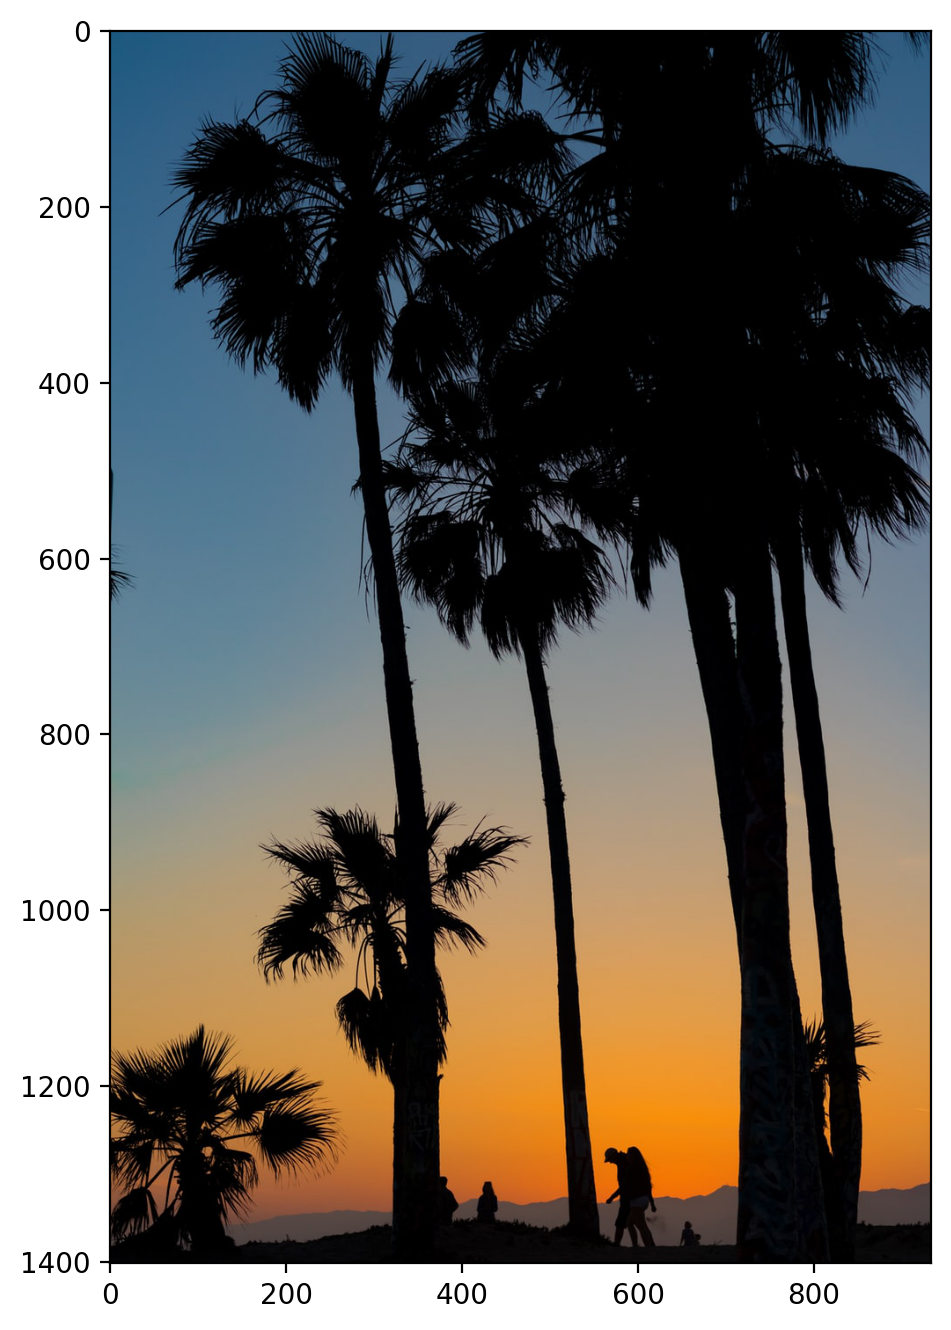

In [16]:
plt.figure(figsize=(12, 8), dpi=200)
plt.imshow(image_as_array)

Метод `.imshow()` не может принимать на вход название файла jpeg, он работает только с массивами numpy.

## Квантование цветов с помощью Kmeans

### Преобразуем данные из 3d в 2d
Kmeans работает с двумерными данными (строки с данными и колонки с признаками), поэтому мы поменяем форму данных следующим образом: (h,w,c) ---> (h * w,c)

In [21]:
# Выполним распаковку кортежа
(h, w, c) = image_as_array.shape

In [23]:
h

1401

In [25]:
w

934

In [27]:
c

3

Поменяем размерность с 3 до 2 - в первом измерении будет h*w, т.е. мы разворачиваем в единый столбец каждый из трёх двумерных массивов для красного, зелёного и синего цветов; второе измерение оставляем как есть. 

В итоге: по строкам будут все пиксели, а по колонкам - три базовых цвета.

In [30]:
image_as_array2d = image_as_array.reshape(h*w, c)

In [32]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [34]:
len(image_as_array2d.shape)

2

### Модель K средних

In [39]:
from sklearn.cluster import KMeans

In [41]:
# Хотим получить только 6 цветов
model = KMeans(n_clusters=6)

In [43]:
labels = model.fit_predict(image_as_array2d)

In [45]:
labels

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

Посмотрим на центры кластеров

In [47]:
model.cluster_centers_

array([[  2.78103225,   2.60145026,   3.7291262 ],
       [192.85405704, 154.53547675, 108.09249586],
       [ 71.62354744, 109.69246168, 137.95707492],
       [219.29852518, 135.05268253,  46.12978403],
       [ 67.70074323,  61.95469858,  62.42405851],
       [138.32302778, 144.26098747, 143.53906242]])

Здесь видны шесть различных цветов в формате красный, зелёный, синий

In [51]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [53]:
rgb_codes

array([[  3,   3,   4],
       [193, 155, 108],
       [ 72, 110, 138],
       [219, 135,  46],
       [ 68,  62,  62],
       [138, 144, 144]])

Цвет, который имеет очень маленькие значения во всех трёх компонентах - это практически чёрный цвет.

После этого, можно взять эти шесть цветов и, для каждой точки исходного изображения, заменить цвета всех точек на один из этих шести цветов.

Мы выполним команду, которая возьмёт палитру из шести цветов rgb_codes и, с помощью этой палитры, вернёт цвета для массива labels. На выходе получится столько же значений, сколько было значений в массиве labels, но теперь вместо чисел 0, 1, 2, 3 и т.д. подставлены соответствующие значения из палитры rgb_codes.

In [58]:
rgb_codes[labels]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [60]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

По сути мы взяли эти точки и получили такой же массив, но исходные цвета в нём заменены на те цвета, которые являются ближайшими согласно кластеризации данных на шесть цветов.

In [63]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [65]:
quantized_image

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 68,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 68,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

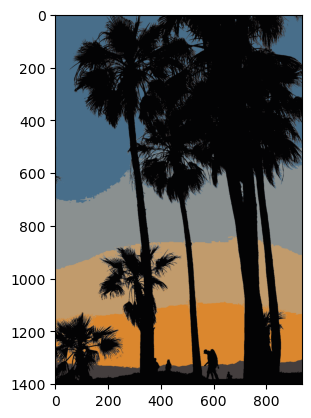

In [67]:
plt.imshow(quantized_image)